In [146]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


########################################################################################
# Ruta del CSV en Drive
ruta_Happiness_report_csv = '/content/drive/MyDrive/Colab Notebooks/DataSets/Happiness_report.csv'
ruta_Metadata_csv = '/content/drive/MyDrive/Colab Notebooks/DataSets/Metadata.csv'

#Cargar los archivos CSV en un DataFrame individuales
df_Happiness = pd.read_csv(ruta_Happiness_report_csv)
df_Metadata = pd.read_csv(ruta_Metadata_csv)


In [147]:
# Filtramos
df_Mexico = df_Happiness[df_Happiness["Country or region"] == "Mexico"]
df_Mexico.set_index("Country or region", inplace=True)


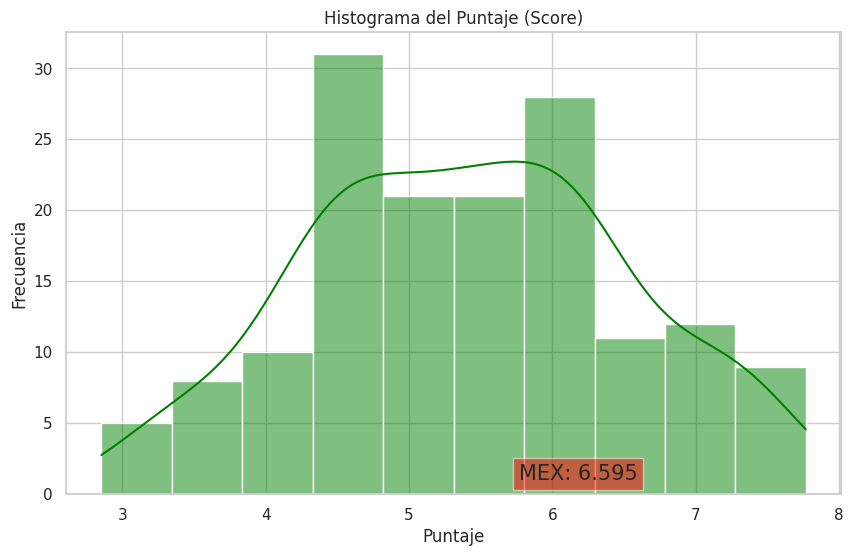

In [148]:
# Configuración de estilo
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_Happiness["Score"], bins=10, kde=True, color="green")

mexico_score = df_Mexico["Score"].values[0]
plt.text(mexico_score, 1, "MEX: {:.3f}".format(mexico_score), fontsize=15, ha='right', bbox=dict(facecolor='red', alpha=0.5))

plt.title("Histograma del Puntaje (Score)")
plt.xlabel("Puntaje")
plt.ylabel("Frecuencia")
plt.show()

0.861


Text(1.1, 0.961, 'MEX')

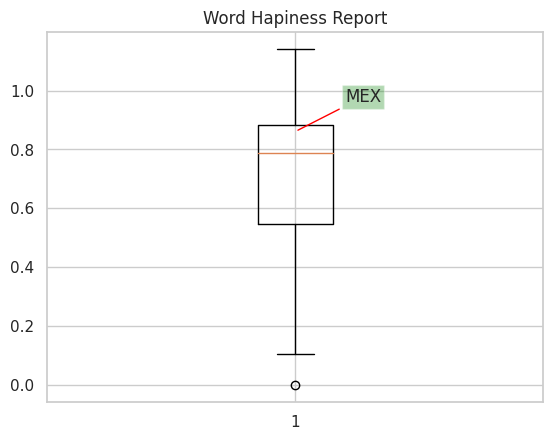

In [149]:
# Crear el boxplot
plt.boxplot(df_Happiness["Healthy life expectancy"])
plt.title("Word Hapiness Report")

# Encontrar la posición de México
mexico_position = df_Happiness[df_Happiness["Country or region"] == "Mexico"]["Healthy life expectancy"].values[0]
print(mexico_position)

# Agregar una flecha
plt.annotate('MEX',xy=(1,mexico_position),xytext=(1.1,mexico_position+0.10),arrowprops=dict(arrowstyle='-',color='red'),bbox=dict(facecolor='green',alpha=0.3,pad=2))

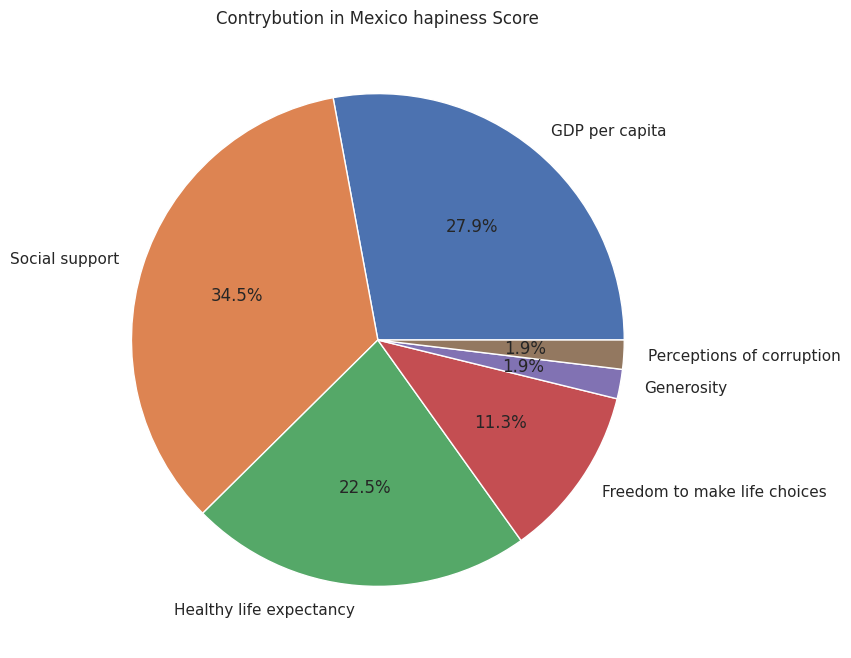

In [150]:
# Filtrar
mexico_data = df_Happiness[df_Happiness['Country or region'] == 'Mexico'][['GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# Graficar
plt.figure(figsize=(8, 8))
plt.pie(mexico_data.iloc[0], labels=mexico_data.columns, autopct='%1.1f%%', startangle=360)
plt.title('Contrybution in Mexico hapiness Score')
plt.show()

In [151]:
# Encontrar el país más feliz y el menos feliz
df_pais_mas_feliz = df_Happiness[df_Happiness['Score'] == df_Happiness['Score'].max()]
df_pais_menos_feliz = df_Happiness[df_Happiness['Score'] == df_Happiness['Score'].min()]

# Filtrar
df_paises_seleccionados = df_Happiness[df_Happiness['Country or region'].isin(['Mexico', 'North Macedonia', 'Ukraine'])]

# Concatenar
df_merge_paises = pd.concat([df_pais_mas_feliz, df_pais_menos_feliz, df_paises_seleccionados])
df_merge_paises.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
83,84,North Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034
132,133,Ukraine,4.332,0.820,1.390,0.739,0.178,0.187,0.010


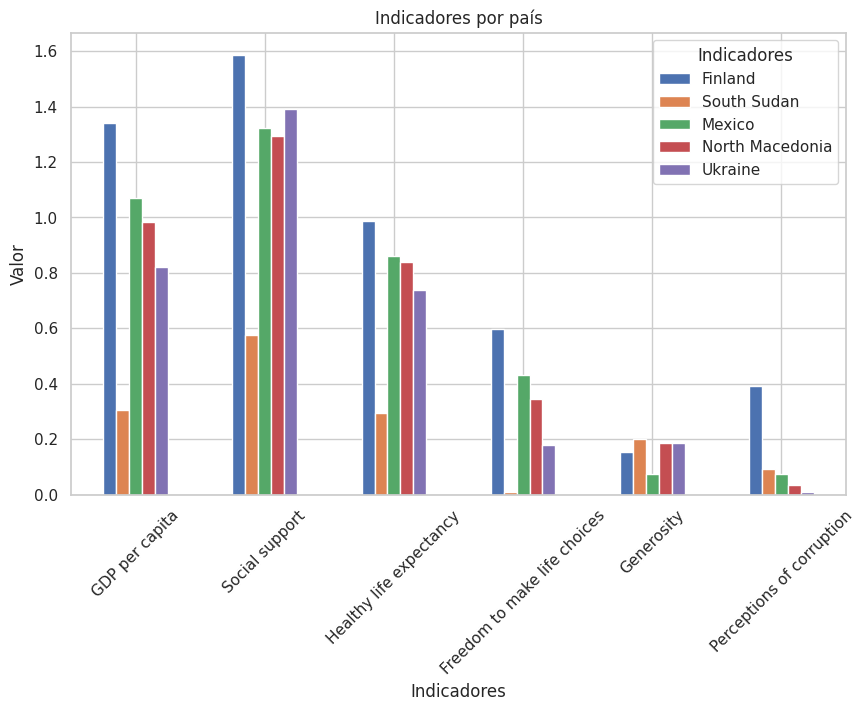

In [152]:
# Establecer el país como índice
df_merge_paises.set_index('Country or region', inplace=True)
df_merge_paises = df_merge_paises.transpose()

# Filtrar las columnas
columns_to_plot = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]
df_filtered = df_merge_paises.loc[columns_to_plot]

# Graficar
df_filtered.plot(kind='bar', figsize=(10, 6))
plt.title('Indicadores por país')
plt.xlabel('Indicadores')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(title='Indicadores')
plt.show()

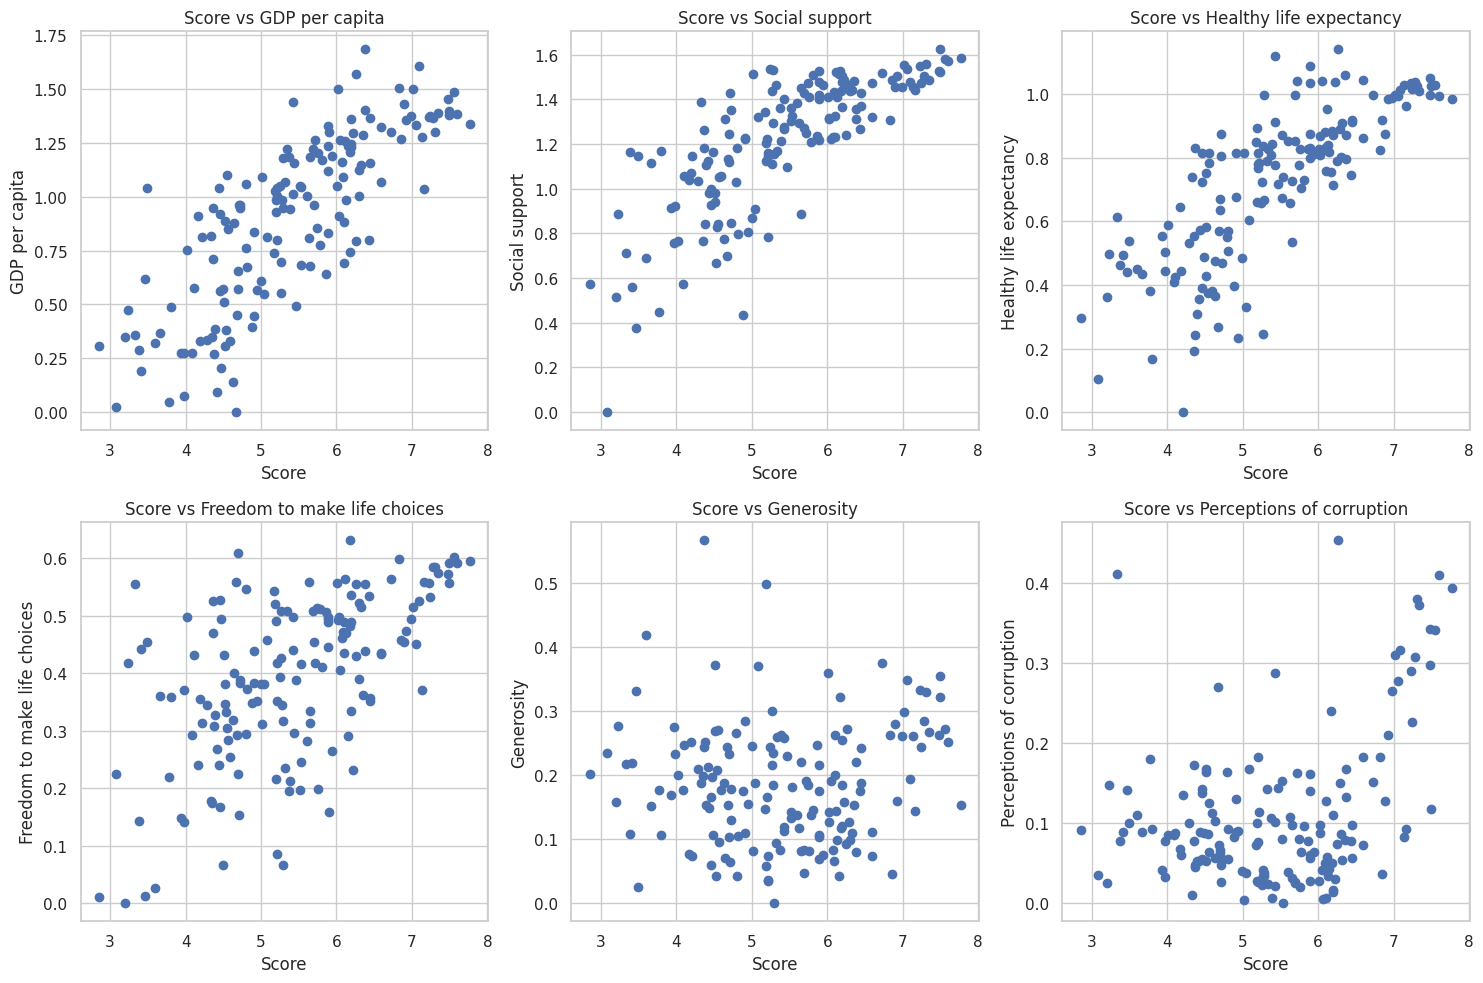

In [153]:
# Crear una matriz de subgráficas de 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterar sobre las columnas restantes y crear scatter plots para cada una
for i, column in enumerate(df_Happiness.columns[3:]):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index]
    ax.scatter(df_Happiness['Score'], df_Happiness[column])
    ax.set_title(f'Score vs {column}')
    ax.set_xlabel('Score')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

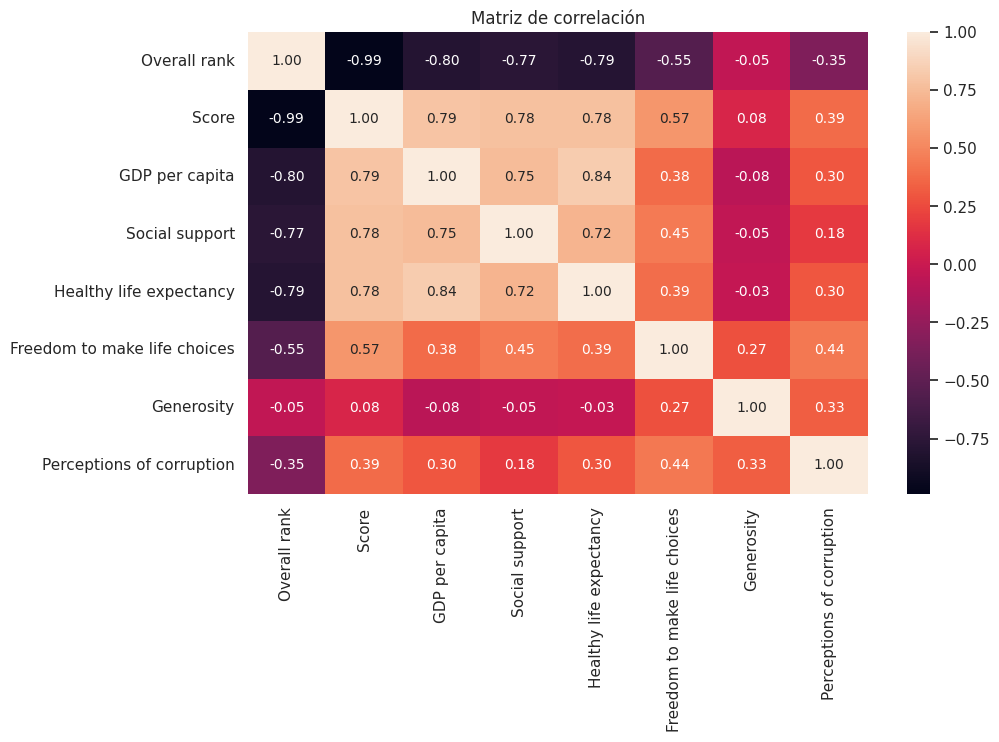

In [154]:
# Eliminar la columna 'Country or region'
df_Happiness_numerico = df_Happiness.drop(columns=['Country or region'])

# Calcular la matriz de correlación
correlation_matrix = df_Happiness_numerico.corr()

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de correlación')
plt.show()


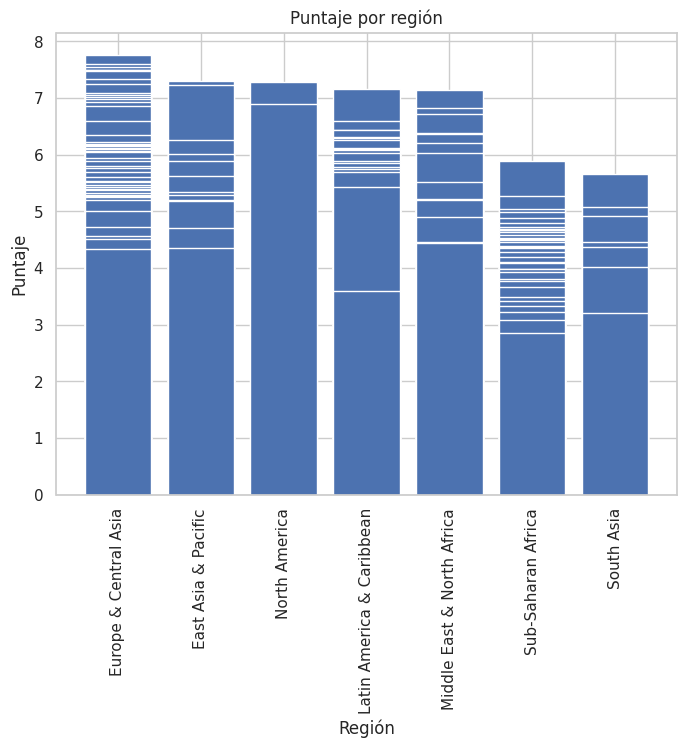

In [155]:
# Unir los DataFrames
df_HappinessMetadata = pd.merge(df_Happiness, df_Metadata, left_on='Country or region', right_on='TableName', how='inner')

# Eliminar la columna duplicada 'TableName'
df_HappinessMetadata.drop(columns=['TableName'], inplace=True)

# Graficar
plt.figure(figsize=(8, 6))
plt.bar(df_HappinessMetadata['Region'], df_HappinessMetadata['Score'])
plt.xticks(rotation=90)
plt.title('Puntaje por región')
plt.xlabel('Región')
plt.ylabel('Puntaje')
plt.show()